<a href="https://colab.research.google.com/github/Ghiles1010/checkpoints/blob/main/Checkpoint_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Explore Data

In [7]:
df = pd.read_csv('kc_house_data.csv')

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [10]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Cleaning Data

In [11]:
# we drop the ID column
df.drop("id", axis = 1, inplace = True)

In [12]:
print(df["zipcode"].describe())
# all the zip code are in the range of 98001 to 98199

df["zipcode"].unique()

count    21613.000000
mean     98077.939805
std         53.505026
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64


array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [13]:
z_df = df["zipcode"].apply(lambda x: int(str(x)[1:3]))

print(z_df.value_counts())
# there is 12636 houses in the area 80 and 8977 in the area 81

print(print(df["price"].corr(z_df)))
# there is no linear correlation between price and zipcode

print(df["lat"].corr(z_df))
# there is a linear correlation between latitude and zipcode

print(df["long"].corr(z_df))
# there is a linear correlation between longitude and zipcode

"""
All the houses of the dataset are located in the same area, seattle.
there not no significant influence of the location on the house price 
because they are all located in the same area. so, in this case, we can ignore the features
related to the location.
"""


df.drop("zipcode", axis = 1, inplace = True)
df.drop("lat", axis = 1, inplace = True)
df.drop("long", axis = 1, inplace = True)

80    12636
81     8977
Name: zipcode, dtype: int64
-0.011765079837944673
None
0.3246764352483701
-0.7095846699291807


# Feature Trasformation

Text(0.5, 1.0, 'Average house price')

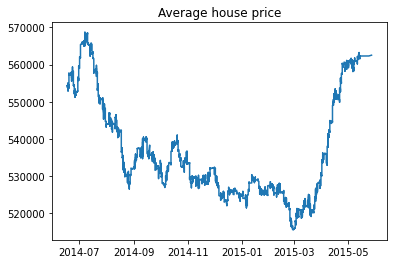

In [14]:
df["date"] = pd.to_datetime(df["date"]).dt.date
p_d = df[["date", "price"]].sort_values(by = "date")
plt.plot(p_d.date, p_d.price.rolling(window=3000).mean())

# we are using the rolling mean to smooth the data.
plt.title("Average house price")





In [15]:
def plot_correlation_map(df, target):

    corr = df[df.columns.difference([target])].corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 },
     ax=ax, annot = True, annot_kws = { 'fontsize' : 12 }
     )

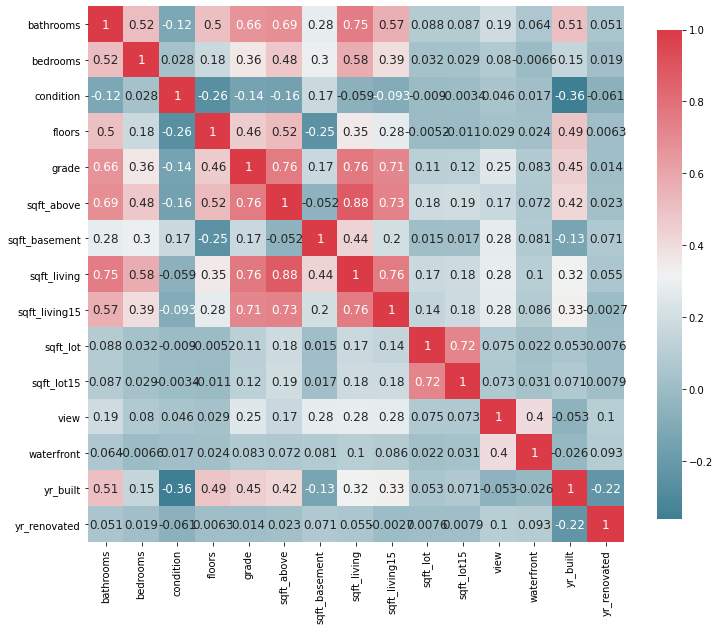

In [16]:
plot_correlation_map(df, target="price")

In [17]:
# sqrft_above can be deducted from sqrft_basement
df.drop("sqft_above", axis = 1, inplace = True)

# year built and year renovated are represented by the condition feature
df.drop("yr_built", axis = 1, inplace = True)
df.drop("yr_renovated", axis = 1, inplace = True)

# reprented by living and lot size
df.drop("sqft_living15", axis = 1, inplace = True)
df.drop("sqft_lot15", axis = 1, inplace = True)
df.drop("bathrooms", axis = 1, inplace = True)

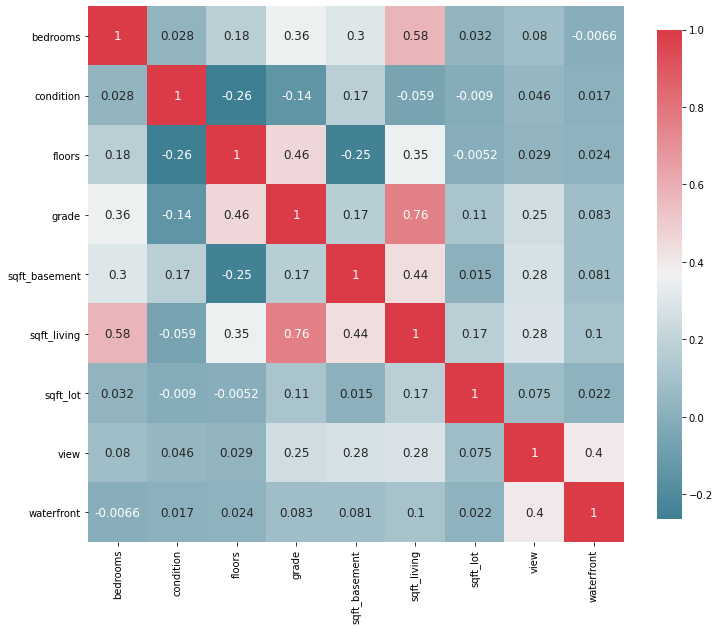

In [18]:
plot_correlation_map(df, target="price")

In [19]:
numeric_features = ["price", "bedrooms", "floors", "sqft_basement", "sqft_living", "sqft_lot"]

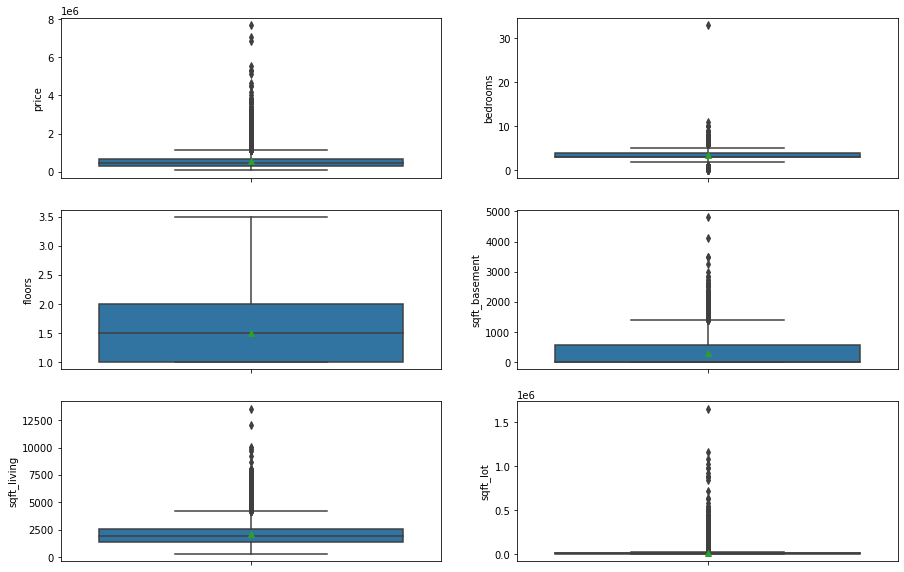

In [20]:
n_df = df[numeric_features]

fig, ax = plt.subplots(3, 2, figsize=(15, 10))

for i, column in enumerate(n_df.columns):
    sns.boxplot(data = n_df,y = column, ax = ax[i//2, i%2], showmeans=True)


In [21]:
"""
we can see that our data suffer from extreme outliers, especially sqrft_lot feature
"""

'\nwe can see that our data suffer from extreme outliers, especially sqrft_lot feature\n'

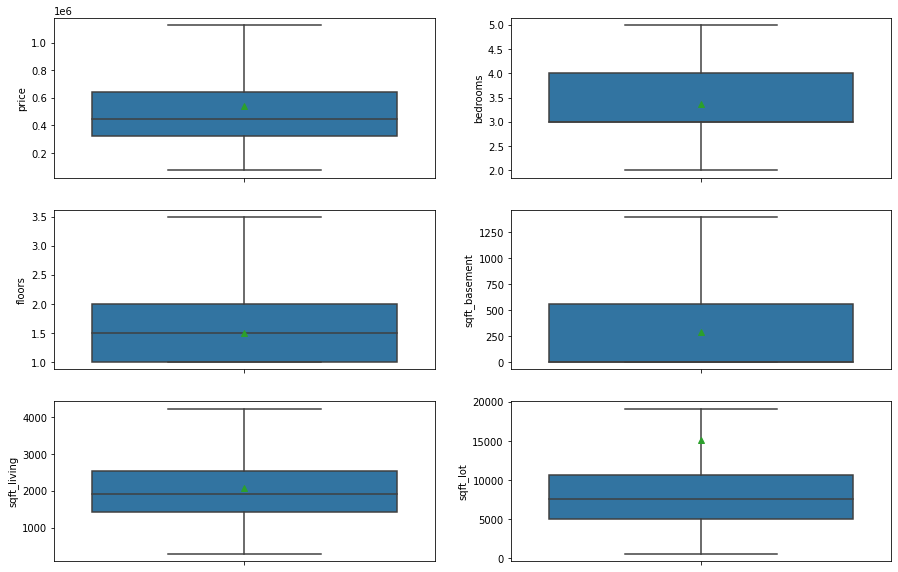

In [22]:
fig, ax = plt.subplots(3, 2, figsize=(15, 10))

for i, column in enumerate(n_df.columns):
    sns.boxplot(data = n_df,y = column, ax = ax[i//2, i%2], showmeans=True, showfliers=False)


In [23]:
"""
We can see that sqft_lot median is very far from the mean,
we will use the media to normalize it 
so we won't be affected by outliers
"""

"\nWe can see that sqft_lot median is very far from the mean,\nwe will use the media to normalize it \nso we won't be affected by outliers\n"

In [24]:
df.mean()

price            540088.141767
bedrooms              3.370842
sqft_living        2079.899736
sqft_lot          15106.967566
floors                1.494309
waterfront            0.007542
view                  0.234303
condition             3.409430
grade                 7.656873
sqft_basement       291.509045
dtype: float64

In [25]:
# normaliazing dates
max_date = df.date.max()
min_date = df.date.min()

range_days = (max_date - min_date).days

df["date"] = (df["date"]-min_date).apply(lambda x:x.days) / range_days

In [26]:
numeric_features = ["price", "bedrooms", "floors", "sqft_basement", "sqft_living", "sqft_lot", "condition", "grade"]

#calculating z_score
for column in numeric_features:

    # we use the median for sqft_lot
    mu = df[column].mean() if column != "sqft_lot" else df[column].median()
    std = df[column].std()

    df[column] = (df[column] - df[column].mean()) / df[column].mean()

In [27]:
df.head()

,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement
0,0.420513,-0.589141,-0.110015,-0.432665,-0.626000,-0.330794,0,0,-0.120087,-0.085789,-1.000000
1,0.566667,-0.003866,-0.110015,0.235636,-0.520619,0.338411,0,0,-0.120087,-0.085789,0.372170
2,0.766667,-0.666721,-0.406676,-0.629790,-0.338054,-0.330794,0,0,-0.120087,-0.216390,-1.000000
3,0.566667,0.118336,0.186647,-0.057647,-0.669027,-0.330794,0,0,0.466521,-0.085789,2.121687
4,0.748718,-0.055710,-0.110015,-0.192269,-0.465147,-0.330794,0,0,-0.120087,0.044813,-1.000000


# Linear Regression

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
train, test = train_test_split(df, test_size=0.2, random_state = 42)

In [30]:
"""
since there's considerable correlation between price and sqft_living,
we will apply linear regression on them
"""

x_train, y_train = train["sqft_living"].values.reshape(-1,1), train["price"]
x_test, y_test = test["sqft_living"].values.reshape(-1,1), test["price"]

model=LinearRegression()   

model.fit(x_train, y_train)  


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Plot Linear

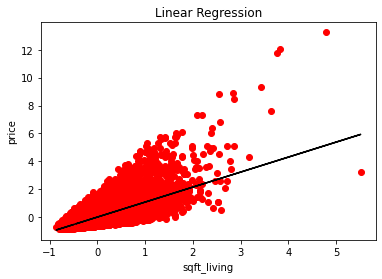

In [31]:
x, y = df["sqft_living"], df["price"]

plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")

x = x.values.reshape(-1,1)

plt.plot(x,model.predict(x),color="k")
plt.show()

# Measure Performance Linear Regression

In [32]:
predicted=model.predict(x_test) 

print("MSE", mean_squared_error(y_test, predicted))
print("R squared", r2_score(y_test, predicted))

MSE 0.26220855479235067
R squared 0.4940690538908902


# Multi-linear Regression

In [33]:
y = df["price"]
x = df.drop("price", axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
model = LinearRegression() 

model.fit(x_train,y_train) 
predicted=model.predict(x_test) 

# Testing Performance

In [35]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", r2_score(y_test,predicted))

"""
We can see that the multi linear model is better than the simple linear model.
"""

MSE 0.19958042021726985
R squared 0.6149099295965353


'\nWe can see that the multi linear model is better than the simple linear model.\n'

# Polynomial resgression

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 




lg = LinearRegression() 
poly = PolynomialFeatures(degree = 2) 


x_train, y_train = train["sqft_living"].values.reshape(-1,1), train["price"]
x_test, y_test = test["sqft_living"].values.reshape(-1,1), test["price"]


x_train_poly = poly.fit_transform(x_train)

model = LinearRegression()

model.fit(x_train_poly, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Measuring performance

In [37]:
x_test_poly = poly.fit_transform(x_test)
predicted = model.predict(x_test_poly)

print("MSE", mean_squared_error(y_test, predicted))
print("R squared", r2_score(y_test, predicted))

MSE 0.28150593817386504
R squared 0.45683478653690757


# Plot performance

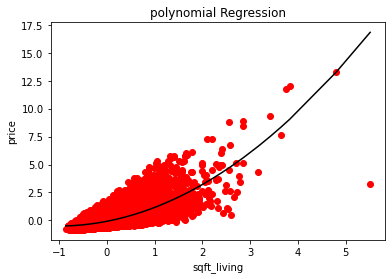

In [38]:
n_df = df.sort_values(by="sqft_living")

x, y = n_df["sqft_living"], n_df["price"]

plt.scatter(x,y,color="r")
plt.title("polynomial Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")

x = x.values.reshape(-1,1)

plt.plot(x,model.predict(poly.fit_transform(x)),color="k")
plt.show()

# Interpretation

The results are better than the linea regression, we can see that the graph follows the exponential evolution of the prices, which leads to a more generelized model with better performance

However, the results of the multi-linear model are better because we are using all the features in it. so we have much more information
